# Lesson 4.2 Communicating data with ggplot 

This lesson will walk through steps to edit a plot in ggplot using layers and settings for color, style, themes, and more. 

## Introduction

In the first part of this module, you explored data collected by K'avi tribal forestry managers on the total number of board feet for all Douglas Firs within a one acre area for four different sites. Based on data analysis and other qualitative factors, you decided which site would be the best for a timber harvest.

Based on your exploration of this timber data set in the first part of this module, it is time to present what you have learned to the broader community. You will create and present suggestions on the management of these forests to the community, using the data science tools you have developed throughout the semester. 

The goal of this lesson is to work on refining the graphs that you have been making throughout the course so that they are an effective tool for sharing what you have learned through your data analysis with the broader community. We will demonstrate each new graphing tool using a graph of the density of trees which is defined here as the number of trees within a one acre plot versus the age of the one acre plot and then we will let you explore ways to use each technique on the plot of board feet versus age that you created at the end of day 1 of this module. 


## Outlining your presentation

🧠✍️**Class Questions:**

*What do you want to present?*

* What are the variables that you have been working with? Why are these variables relevant to the goal of choosing a site to start a timber harvest site on? 
  
* How do those variables change between sites? How are the sites related? What relationship do you want to show between the different sites? 

* In an effort to keep things simple, we have only been working with the yield of a specific site over time but in reality yield is far from the only variable that is relevant when picking out a site for a new timber harvest site. What other things would you want to consider when picking a new site for timber harvest? 

*Who do you want to present it to?*

* Who might you be presenting this information to? What type of background do they have in picking a site for timber harvest? 
  
* Why would this audience be interested in hearing about the productivity of different sites? 
  
*Setting goals for your plot*

* Based on the other factors that are important for picking a timber harvest site that you identified in the first part of this question and the audience you identified in the second part of the question, what role do you think information on board feet versus the age of a forest stand would play in this presentation? 
  
* How would a graph of board feet versus stand age help to achieve that role? What important characteristics should this graph have so that it fills the role you want it to have? 
  
Now that you have an idea of what your goals are for this graph, we will present a couple different tools in ggplot to give you more control over your graphs. With each tool, we will show show one way you can use that tool on a graph of tree density versus stand age and then we will point you towards resources you can use to explore how to implement that tool with your own graphs. 



In [2]:
# Load libraries
library(tidyverse)

# read in data - first site as example 
site_1 <- read.csv("site_1.csv")
# Read in data - all sites combined   
forest <- read.csv("forest.csv")

# preview data frame 
head(forest)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,age,board_feet,tree_density,site_ID
,<int>,<dbl>,<int>,<int>
1,20,0.000,0,1
2,30,6041.434,165,1
3,40,17490.338,278,1
4,50,31906.178,322,1
5,60,44130.086,308,1
6,70,56994.003,279,1


## Refining your graphs

The first part of making an effective graph is picking what kind of graph you want to make. We have generally been using scatter plots, boxplots, and line plots throughout this course but ggplot offers a wide variety of different plot types for you to play with. Generally the first step for picking a plot type is determining how many variables you are trying to represent, what the data type of the variables is, and what your goal for the plot is. 

In our example of the number of trees over time at site 1 we have two different variables, age of the stand and number of trees. Both time and number of trees are continuous variables (not groups) so we can choose either a scatterplot or a line plot to represent them. 

Here is an example of a scatterplot:

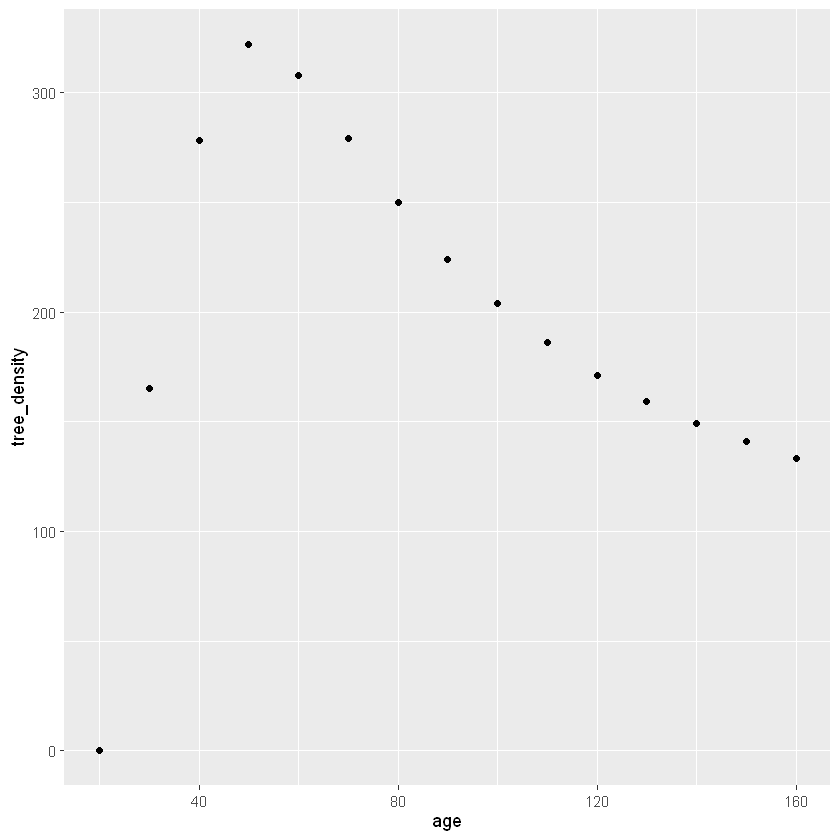

In [3]:
ggplot(site_1, aes(x = age, y = tree_density))+
  geom_point()

Here is a line plot:

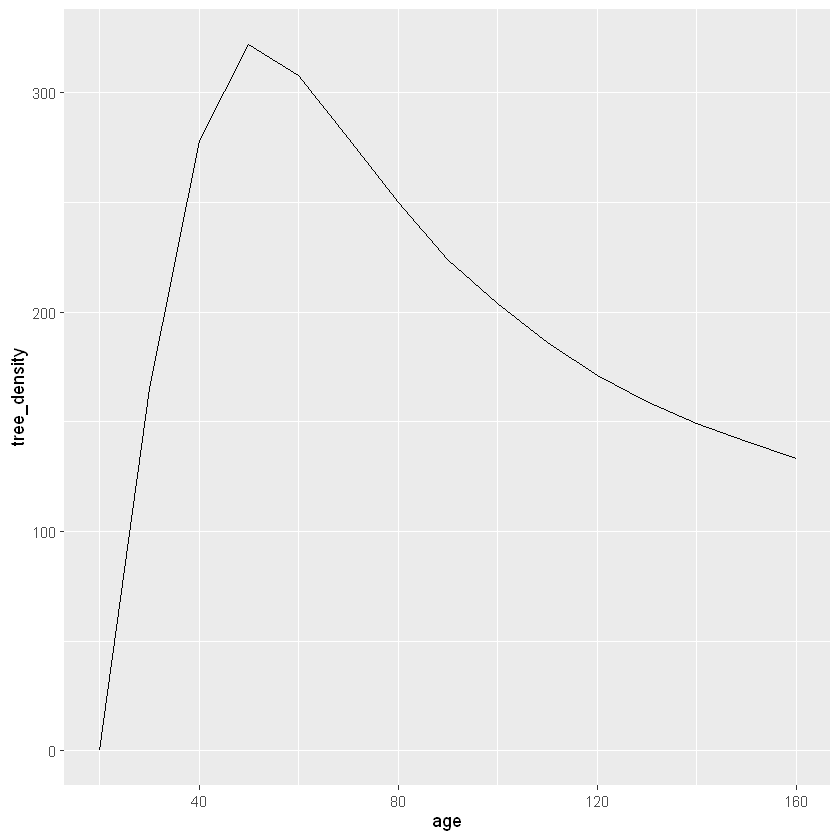

In [4]:
ggplot(site_1, aes(x = age, y = tree_density))+
  geom_line()

These graphs are based on the same information but they portray slightly different messages. The scatterplot focuses on the specific number of trees in each age stand while the line plot focus more on the overall trend in density of trees as the age of the stand increases. 

🧠✍️**Class Questions:**

* Which of these messages fits the goals you identified for this graph in part 1 better? 

* What tradeoffs are you making when you choose one of these plots over the other? 

You can make whichever graph you decided on here:

In [5]:
# add your ggplot code here

Another cool thing that ggplot lets us do is layer different plots on top of one another. Using this we can show both the scatterplot and the line plot. 

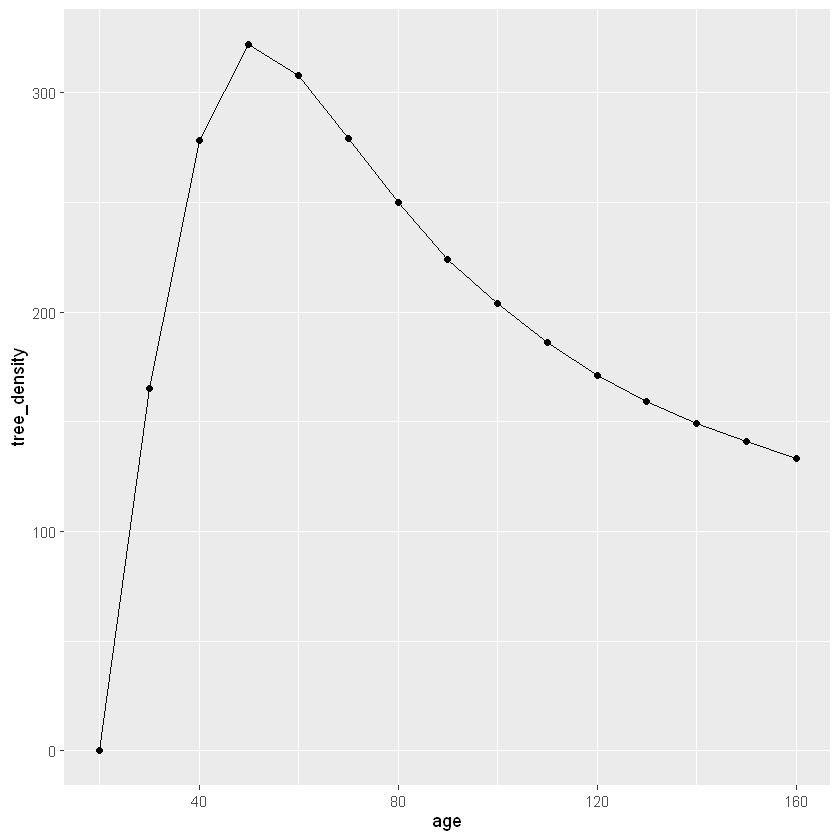

In [6]:
ggplot(site_1, aes(x = age, y = tree_density))+
  geom_line() +
  geom_point()

Try it out with your plot here:

In [7]:
# add your ggplot code here

🧠✍️**Class Questions:**

Now that you have created a basic plot that technically has all of the information in it, lets thinks about how we would refine the graph to best fill the role you want it to fill. Here are a couple of questions that may help get the conversations started.

* What context would someone need to understand the graph that is not already included in the graph? How might you include this context? 

* What parts of the graph that you have right now are the most confusing? How could they be made less confusing? 

* Are there any parts of the graph that are not vital? How could you simplify the graph?


## Informative Labels

One of the first things we can do to make the graph more interpretable is change the text on the graph so that it is meaningful and helpful. 
We can do this using the `labs()` layer in ggplot. To add this layer all you need to do is add a plus sign at the end of the last layer (geom_point or geom_line) and then add the labs layer in the next line. You can type `?labs` in the console to learn about all the different things you can do in this layer but basically, it lets you add a title or caption, change the axis labels, etc.

In our example plot of tree density and age below, we have changed the axis labels and added a title:

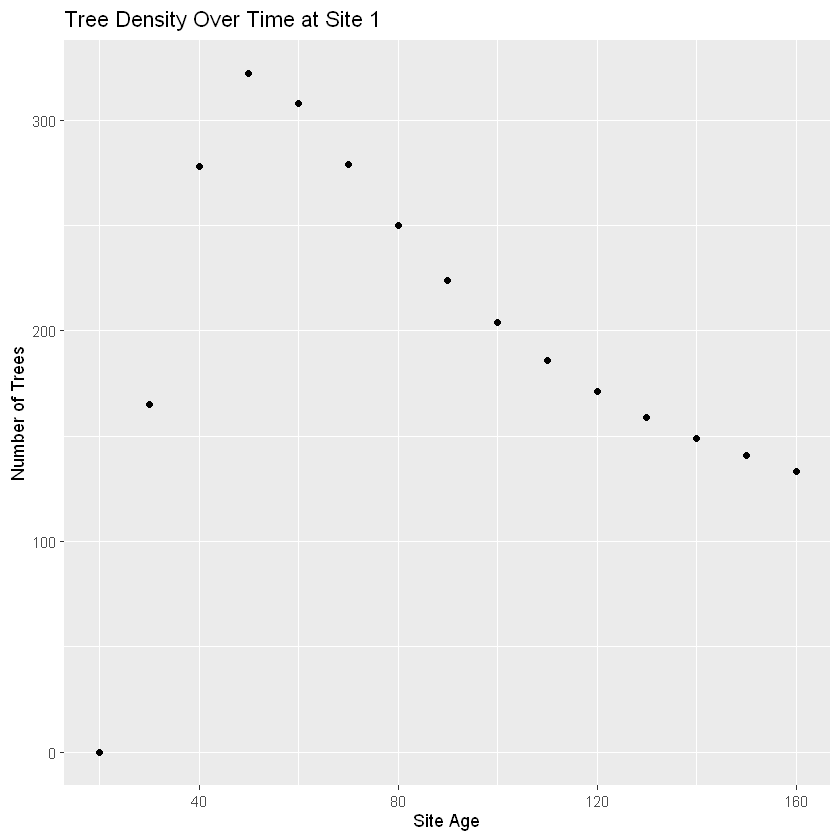

In [20]:
ggplot(data = site_1, aes(x = age, y = tree_density))+
  geom_point()+
  labs(x = "Site Age", y = "Number of Trees", title = "Tree Density Over Time at Site 1")
#The labs function allows you to adjust the labels of many different aspects of
#the graph simultaneously. Caption allows you to add a caption to the graph, 
#while x and y adjust the names of the axes respectively. Finally, title allows
#you to rename the title of the graph and subtitle to add extra information.

🧠✍️**Class Questions**

While you add labels to your graph below, think about the data that you are trying to convey to your chosen audience. 

* How much background information/context will be useful to include on the graph that you are presenting to them? Will they know the units of the axes?

* Take a look at the graph below. What are the differences between it and the one above?

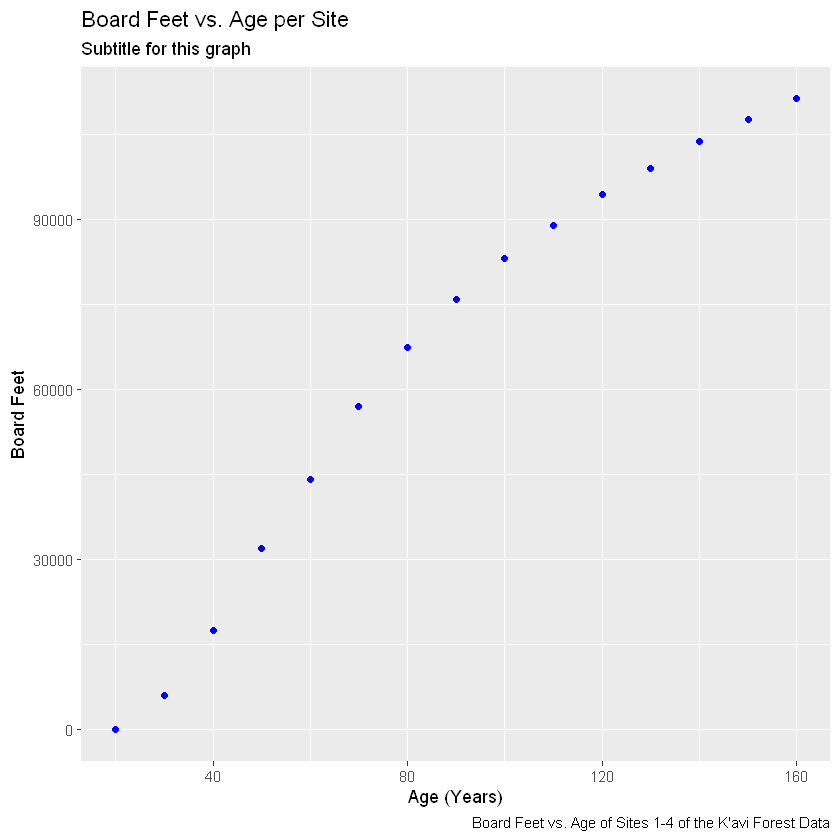

In [21]:
#Calls the function ggplot (we have seen this before), adds which data frame
#the graph is taking information from, and assigns a variable to the x and y axes
ggplot(site_1, aes(x = age, y = board_feet))+
#This tells ggplot what kind of graph to create (a scatter plot), in the
#aesthetics of the graph we can tell R to differentiate each site by a different color
  geom_point(col="blue")+
#The labs function allows you to adjust the labels of many different aspects of
#the graph simultaneously. Caption allows you to add a caption to the graph, 
#while x and y adjust the names of the axes respectively. Finally, title allows
#you to rename the title of the graph and subtitle to add extra information.
  labs(caption = "Board Feet vs. Age of Sites 1-4 of the K'avi Forest Data",
       x="Age (Years)", y="Board Feet", title="Board Feet vs. Age per Site", 
       subtitle="Subtitle for this graph")

In the next code chunk, create your own graph and use `labs()` to add context. 

In [10]:
# add ggplot code here, use labs() to add labels 

## Representing categories - adding more sites

Now that we have a plot that describes the trends at one site we can add in the information from the other sites. There are two main ways to do this, either by creating a different plot for each site and then arranging the plots next to one another, or adding all the sites to one plot. 

First we will show you how to arrange multiple different plots side by side using `facet_wrap()` and our example graph of tree density and stand age.

Facet wrap is a layer to a ggplot object that takes a discrete variable, like a category, and displays it as different panels. In our example, the `site_ID` is a number, so we first convert it to a factor so that it is recognized as a categorical value. Facet wrap creates a plot for each category of `site_ID`. Read more about facet_wrap [here](https://ggplot2.tidyverse.org/reference/facet_grid.html).

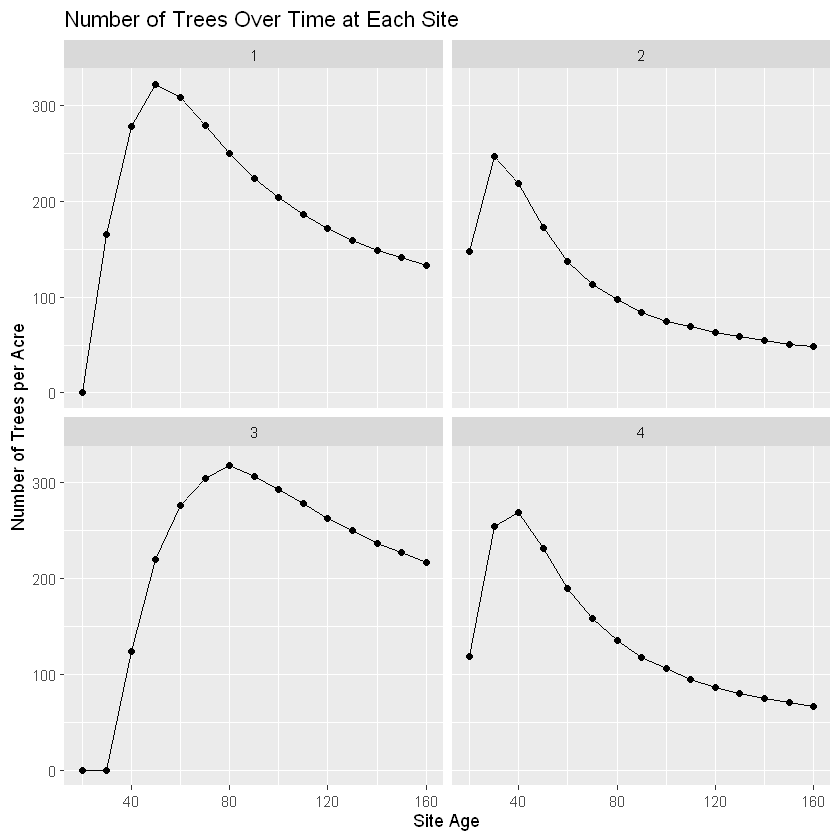

In [23]:
# make site ID a factor 
forest$site_ID = as.factor(forest$site_ID)

# plot forest data frame with site ID in facet wrap 
ggplot(data = forest, aes(x = age, y = tree_density))+
  geom_point() + geom_line() + facet_wrap(~site_ID) + 
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Number of Trees Over Time at Each Site")

The second way to show data from multiple sites is to put all of the sites on one graph. We can do this in the `aes()` portion of the ggplot function by telling R to represent which site a point is from with another aspect of the graph. In our example we will use the color of the points and lines.

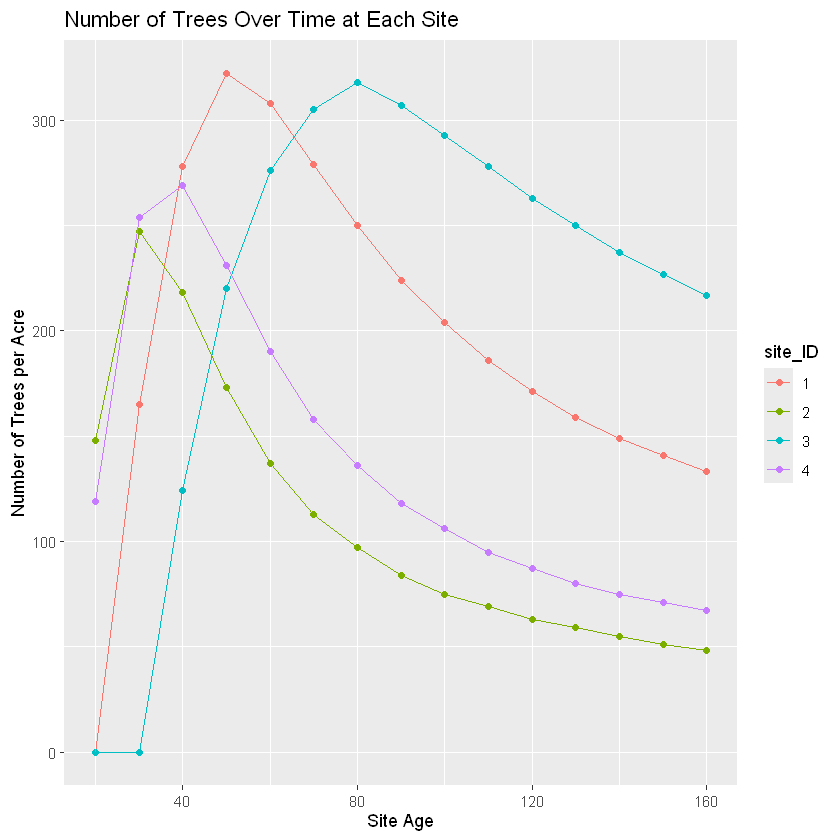

In [12]:
# set color to site_ID as a category 
ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID))+
  geom_point() + geom_line() + 
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Number of Trees Over Time at Each Site")

Both of these methods, arranging multiple graphs and adding colors, will show information on how the sites differ but they each have different pros and cons. In the arranged plots, each individual plot is cleaner and simpler whereas there is a lot going on in the combined plot. However, the combined plot lets you see the differences between sites more clearly and it takes up less space in a slide or a paper. 

🧠✍️**Class Questions:**

* What might be the benefits of putting each site on its own graph? What about including all the sites on the same graph? 
* Which format of including multiple sites do you think will best convey the information to your proposed audience? Why? 

For the example plots in the next couple of sections we will be using the combined plot with different colors because some of the other ggplot techniques we want to highlight are easier to show with that plot. 

## Editing the Legend

You may have noticed in the previous section that when you added color categories for different sites, ggplot automatically created a legend. This legend on the right hand side of the plot describes what each color means. However, like many things ggplot automatically generates, the legend is not particularly reader-friendly. 

🧠✍️**Class Questions:**

* How would changing your legend provide more context to your graph? 
* What would you like to change about your legend to tailor it to your specific audience?

So far the goal of this course has been to help walk you through the foundations of the R coding language and the data science, however, we have only touched on a small fraction of the things that both ggplot and R can do. Many of the applications that you might use R for in the future will be outside the scope of the course so one of our goals for the rest of this lesson is pointing you towards other resources you can use to build on your current knowledge of R. There are a wide variety of books about R that you are welcome to use but often the best way to find the solution to a specific problem you are having in R is just to look it up online. There are a huge variety of resources online about R that go through every possible question you have in a variety of different formats and because R is a free and open source programing language the vast majority of those resources are also free and open to anyone who is interested. Using solutions that you find online for coding problems is widely accepted and standard for people of every skill level and for pretty much any application. Even people who have been working with R for their whole career still look things up online and use them in their code. 

In the next couple of sections we have provided links to a couple of different online resources which address each topic. You are free to explore those links or other resources you may find helpful. We have provided multiple links for each section in case one of the links does not work for any reason. Additionally, here are a couple of links to PDFs about graphing in R that you can save on your device and refer back to later without needing an internet connection:

* ggplot2 tutorial: https://www.tutorialspoint.com/ggplot2/ggplot2_tutorial.pdf
* ggplot2: elegant graphics for data analysis by Hadley Wickham: https://ms.mcmaster.ca/~bolker/misc/ggb.pdf
* ggplot2 Essentials: https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/book-preview/ggplot2-essentials_preview.pdf

Here are a couple of resources about how to change your legend in ggplot. They all cover similar things but you may prefer one over the others:

* [Cookbook for R - Legends](http://www.cookbook-r.com/Graphs/Legends_(ggplot2)/)
* [GGPlot Legend Title, Position and Labels](https://www.datanovia.com/en/blog/ggplot-legend-title-position-and-labels/)
* [ggplot2 legend : Easy steps to change the position and the appearance of a graph legend in R software](http://www.sthda.com/english/wiki/ggplot2-legend-easy-steps-to-change-the-position-and-the-appearance-of-a-graph-legend-in-r-software)

Using one of the resources provided above or another resource that you prefer, change one thing about your legend that you have identified to make it more accessible to your audience. 

In [13]:
# change the legend 

## Adding visual elements

Now that you have a plot with multiple site, different colors, and a legend it's time to give you more control over what those colors are and other ways to show groupings. 

To manually set what colors your plot you can use layer `scale_color_manual()` which will let you individually choose each color in your plot (example below). The resources below will provide you with a list of all the colors that R automatically knows the names of. You can also use the function `colors()` to get a list of all 657 colors that R knows the name of but that does not actually show the color along with the name. 

Resources on Colors in R:

* [Awesome List Of 657 R Color Names](https://www.datanovia.com/en/blog/awesome-list-of-657-r-color-names/)
* [An overview of color names in R](https://r-graph-gallery.com/42-colors-names.html)
* [R Color Brewer palettes](https://r-graph-gallery.com/38-rcolorbrewers-palettes.html)

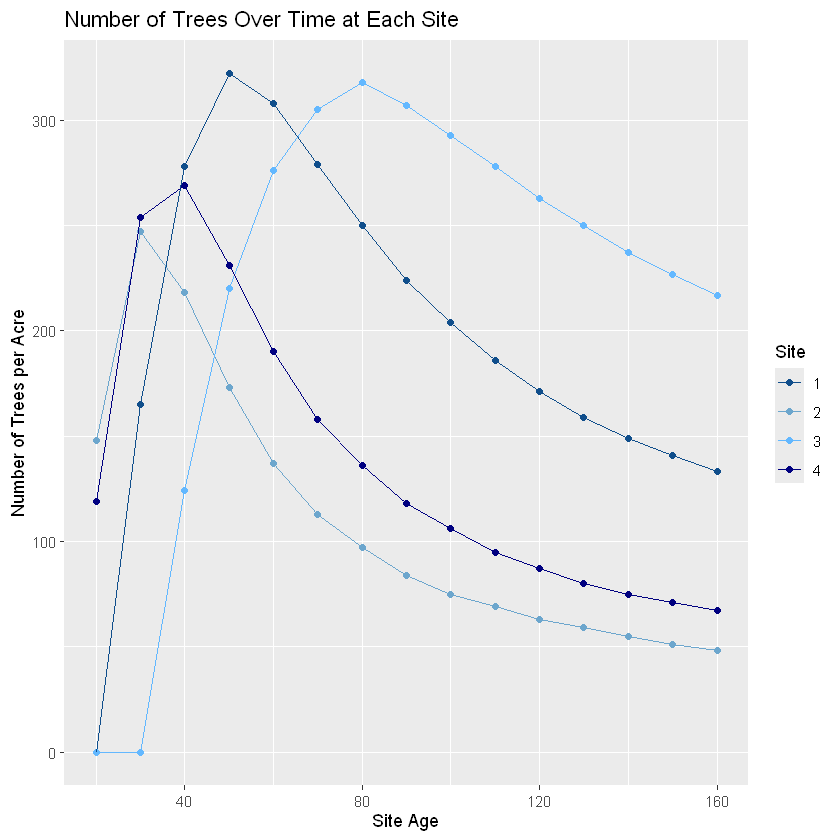

In [14]:
ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID))+
  geom_point()+
  geom_line()+
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Number of Trees Over Time at Each Site", color = "Site")+
  scale_color_manual(values = c("dodgerblue4", "skyblue3", "steelblue1", "navyblue"))

Note that the number of colors you give R must equal the number of categories you have. Change the color in your plot here:

In [15]:
# change the colors to be discrete here

In addition to creating manual color scales, there are preset R color palettes from different packages that we can use when setting the color. In the first example below, we use `scale_color_brewer()` to use a palette from the package [`RColorBrewer`](https://r-graph-gallery.com/38-rcolorbrewers-palettes.html). In the second example we use `scale_color_viridis()` to use a palette from the package [`viridis`](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html).  

It is also important to note here that displaying important information with different colors in your plot can make reading your plots hard for color blindness and/or color vision-deficient people. There are a couple of different ways to help with this including, picking a color palette that is colorblind friendly or using a couple of different methods to distinguish the different groups. 

There is a package in R that specifically has color blind friendly palettes that you can use in your graphs. It is called viridis and here are some examples of it.

In [16]:
install.packages("viridis")

# Loading the package into this session of R. 
library(viridis)

package 'viridis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdt47\AppData\Local\Temp\RtmpKsLWkz\downloaded_packages


Warning message:
"package 'viridis' was built under R version 4.5.1"
Loading required package: viridisLite



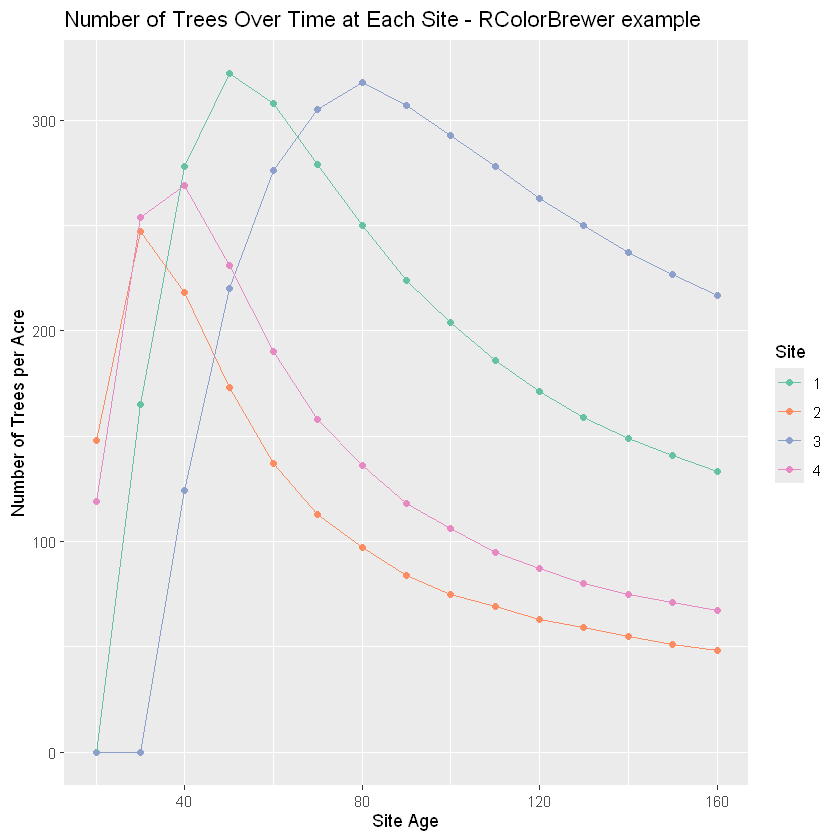

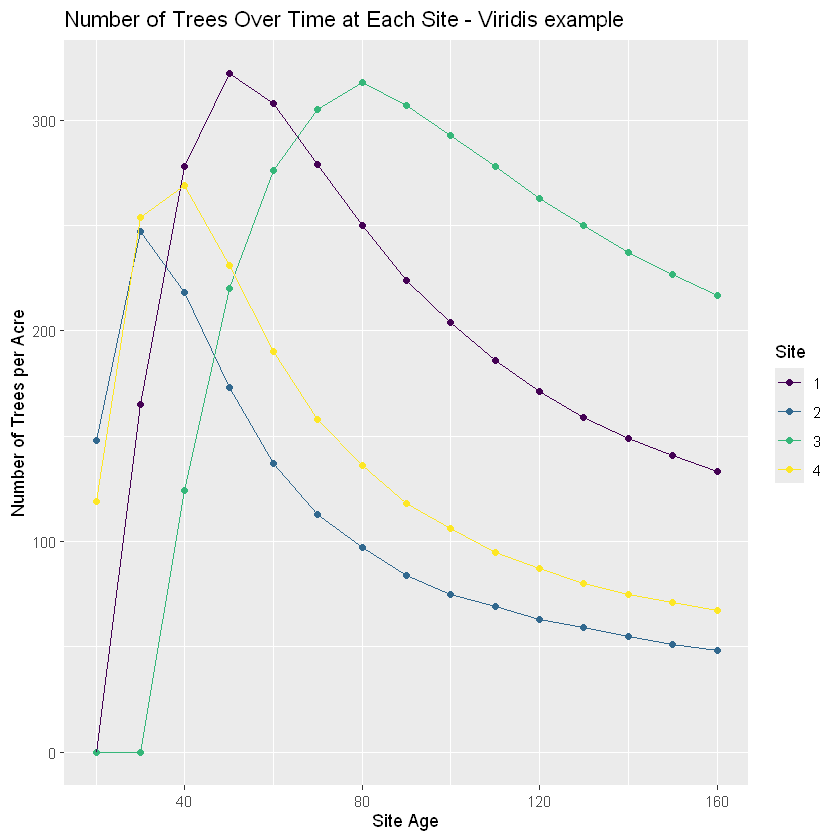

In [27]:
ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID))+
  geom_point()+
  geom_line()+
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Number of Trees Over Time at Each Site - RColorBrewer example", color = "Site")+
# scale color brewer with Set2 palette 
  scale_color_brewer(palette="Set2")

ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID))+
  geom_point()+
  geom_line()+
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Number of Trees Over Time at Each Site - Viridis example", color = "Site")+
#Viridis automatically defaults to a continuous color scale, but since we have a 
#discrete number of sites with a discrete number of colors, we have to add
#discrete = TRUE
  scale_color_viridis(discrete = TRUE)

Another options for making graphs more accessible for color deficient people is by using multiple kinds of visual cues to separate different groups. This can look different for different kinds of plots so here are examples of what this would look like for scatter plots and line plots. Note that the sizes of these elements are exaggerated in the example plots for ease of viewing but you do not have to change the size in your own.  

In scatterplots we can change the shapes of the points. 

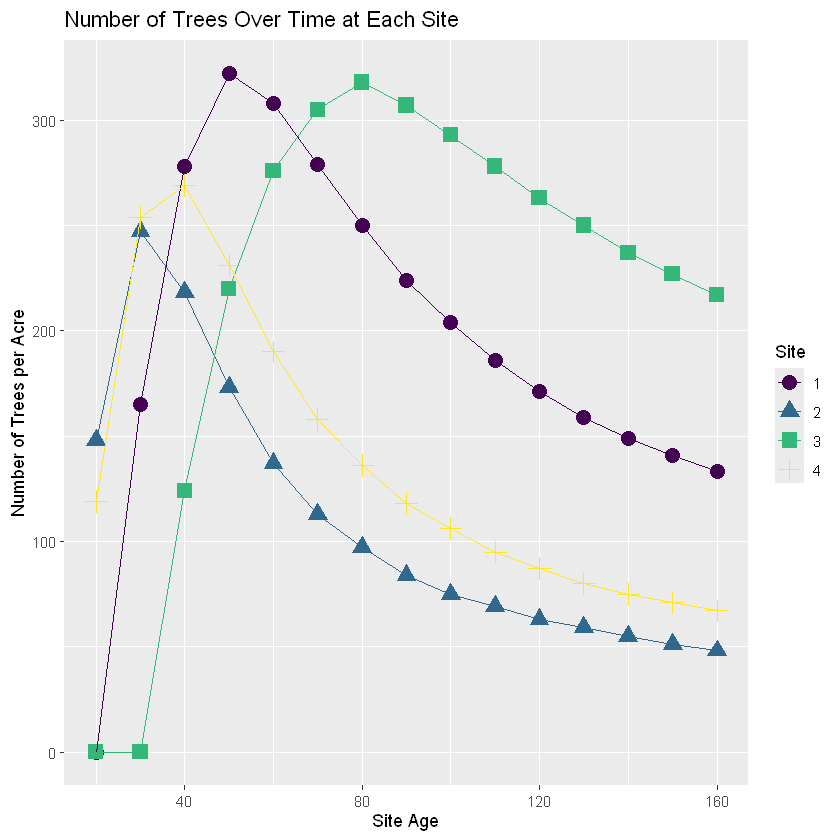

In [18]:
ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID, shape = site_ID))+
#We can use size to make the points larger and easier to see. Larger numbers make
#the points larger on the graph 
  geom_point(size = 4)+ 
  geom_line()+
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Number of Trees Over Time at Each Site", color = "Site", shape = "Site")+
  scale_color_viridis(discrete = TRUE)

With line plots we can change the line types. 

In [ ]:
#Here we can make each site have a different color and a different type of line 
#by assigning them by site_ID
ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID, linetype = site_ID))+
  geom_point()+  
#Again we can use the size command to increase the width of the lines
  geom_line(linewidth = 3)+ 
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Number of Trees Over Time at Each Site", color = "Site", linetype = "Site")+
  scale_color_viridis(discrete = TRUE)

🧠✍️**Class Question:**

* Which of these options do you think is best for your audience?

## Reviewing your plots

Go back to the beginning of this document and look back at what you identified as the key takeaways from the data analysis. Take this as a chance to reflect on if your choice of graph is the best for summarizing this information

Review how you identified your audience. Do the added graph elements that you chose to add benefit this audience? If you could improve the graph in some way, how would you? (even if you don't know how to code this yet)

## If you have extra time: Additional Resources and Future Directions

In the future, if you want to fully customize each element of your graph you will probably run into themes. This topic gets very complicated, very quickly so you do not need to know everything about themes but we want to show you that it is an option if you need it in the future. There are two main ways you might want to use themes, using a predefined theme or using themes to change specific items in your graph.

### Basic themes

Ggplot comes with a couple of predefined themes that you can apply to your graphs. Below we will create the code to apply each predefined themes and then show you what they look like. 

In [ ]:
library(patchwork)

# This code creates a graph with no added theme
no_theme <- ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID))+
  geom_point()+  
  geom_line()+ 
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "No Theme", color = "Site")

# This is the black and white theme
theme_bw <- ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID))+
  geom_point()+  
  geom_line()+ 
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Black and White Theme", color = "Site")+
  theme_bw()

# This one makes the linedraw theme
theme_linedraw <- ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID))+
  geom_point()+  
  geom_line()+ 
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Line Draw Theme", color = "Site")+
  theme_linedraw()

# Dark theme
theme_dark <- ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID))+
  geom_point()+  
  geom_line()+ 
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Dark Theme", color = "Site")+
  theme_dark()

# Minimal Theme
theme_minimal <- ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID))+
  geom_point()+  
  geom_line()+ 
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Minimal Theme", color = "Site")+
  theme_minimal()

# Void Theme
theme_void <- ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID))+
  geom_point()+  
  geom_line()+ 
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Void Theme", color = "Site")+
  theme_void()

(no_theme + theme_bw + theme_linedraw)/(theme_dark + theme_minimal + theme_void)

Feel free to check out these resources for a list of all the predefined themes:

* [Themes chapter from ggplot2: Elegant graphics for data analysis (3e)](https://ggplot2-book.org/themes)
* [ggplot Themes gallery](https://www.datanovia.com/en/blog/ggplot-themes-gallery/)
* [Themes in ggplot2](https://r-charts.com/ggplot2/themes/)


### More Detailed Themes

Themes in ggplot also let you build your own themes by specifying each element in your graph. 

If you have extra time feel free to explore these links to see how you would change a specific element of your graph but we are mainly including the following links so that in the future if you are refering back to this lesson you have some more resources to look at to further customize your plots. We have also included a plot below to show just how many things you can change with themes (and how terrible you can make the graphs look with themes):

* https://ggplot2-book.org/themes (Part 17.3) 
* https://ggplot2tor.com/theme/
* https://datavizm20.classes.andrewheiss.com/lesson/05-lesson/ 

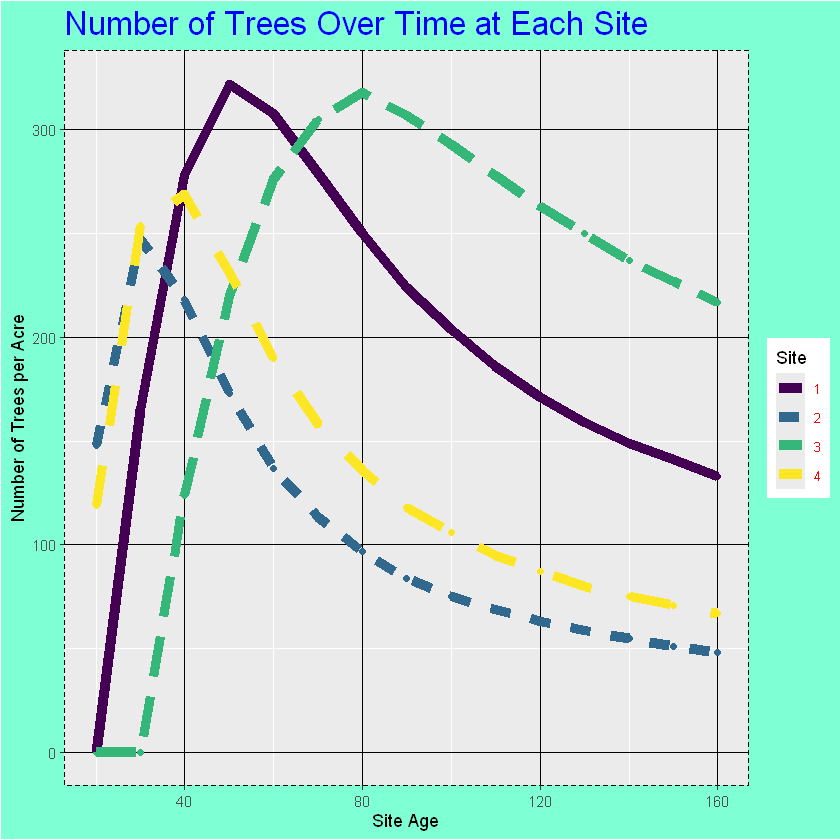

In [30]:
#This allows you to adjust finer details of the graph. For instance, you can 
#adjust the size and color of the title and subtitle. 
ggplot(data = forest, aes(x = age, y = tree_density, color = site_ID, linetype = site_ID))+
  geom_point()+  
#Again we can use the size command to increase the width of the lines
  geom_line(size = 3)+ 
  labs(x = "Site Age", y = "Number of Trees per Acre", title = "Number of Trees Over Time at Each Site", color = "Site", linetype = "Site")+
  scale_color_viridis(discrete = TRUE)+
  theme(plot.title = element_text(size= "20", color="blue"), #Changes the color of the title
    plot.background = element_rect(fill="aquamarine"), #Changes the color of the background
    panel.border = element_rect(linetype = "dashed", fill = NA), # gives the border of the plot a dashed line
    panel.grid.major = element_line(colour = "black"), #Makes the grid lines heavy 
    legend.text = element_text(size = 8, colour = "red")) # Makes the text of the legends red

Keep trying new things in the next cell: 

In [ ]:
# add ggplot code here 

## Lesson 4.2 Recap

This lesson has included steps to edit plots in ggplot, including refnining graphs, adding informative labels, and changing color. As an overview, the steps we took to edit our plots were:

1. Refine graphs - consider the audience and the messaging
2. Add informative labels to axes and title using `labs()`
3. Represent different categories with `facet_wrap()` or by setting color inside `aes()`
4. Edit legend location
5. Add visual elements by editing the color palette, changing shapes and linewidth
6. Setting ggplot themes 

